In [1]:
import pandas as pd
import Quandl
import pandas_datareader.data as web
%matplotlib inline

In [2]:
start = pd.Timestamp("1991-11-08")
end = pd.Timestamp("2015-12-30")
year = pd.Timedelta('365 days')
online = False

In [3]:
if online:
    ipc = web.DataReader("^MXX", 'yahoo', start, end)
    usdmxn = Quandl.get("CURRFX/USDMXN")
    ipc.to_csv('ipc_mxn.csv')
    usdmxn.to_csv('usdmxn.csv')
else:
    ipc = pd.read_csv('ipc_mxn.csv', index_col='Date', parse_dates=True)
    usdmxn = pd.read_csv('usdmxn.csv', index_col='Date', parse_dates=True)

In [4]:
df = pd.DataFrame()
df['ipc_mxn'] = ipc[u'Adj Close']
df['usdmxn'] = usdmxn.Rate
df['ipc_usd'] = df.ipc_mxn / df.usdmxn

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C48ACF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C866BA8>], dtype=object)

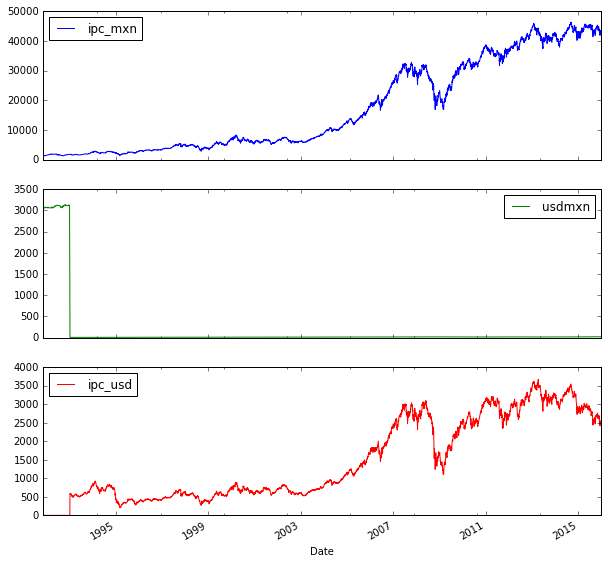

In [5]:
df.plot(subplots=True, figsize=(10, 10), sharex=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D2AEC88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D4DE0B8>], dtype=object)

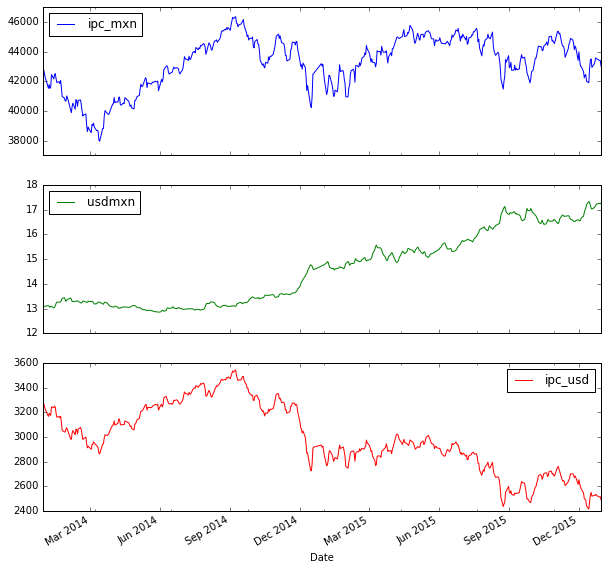

In [6]:
# Los últimos 2 años
df.loc[(end - 2*year):].plot(subplots=True, figsize=(10, 10), sharex=True)